# FlowEmbedder: Snake Test Case

In [12]:
# default_exp flow_embedding
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pseudo Code

1) create function that is the "ribbon"
2) sample points from ribbon
3) calculate flow at each point

# Test Example 1: 3D Sinusoidal

In [13]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

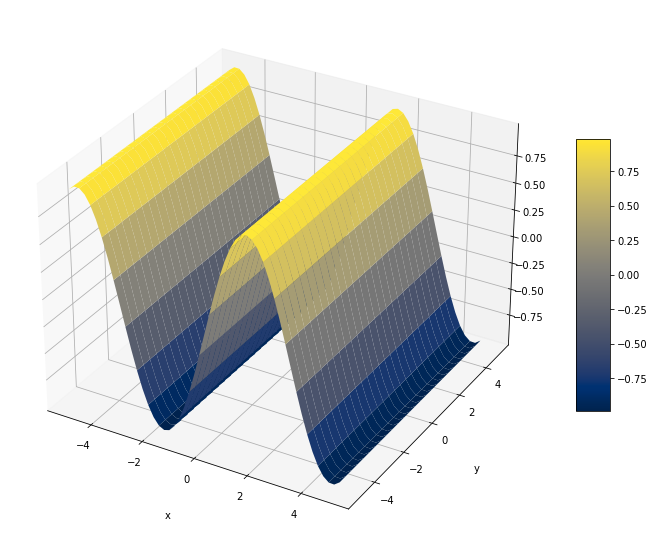

In [14]:
# 1) define function and plot ribbon



# define inputs (TODO: THIS IS TEMPORARY. MAKE THIS INTO A FUNCTION.)
start = -5
end = 5.1
increment = 0.2
num_points = 100
dim = 3


fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(start, end, increment)
y = np.arange(start, end, increment)

X, Y = np.meshgrid(x, y)
# define function
Z = np.sin(X)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# label axis
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [15]:
# 2) sample points uniformly from ribbon
sample_x = np.random.uniform(low=start, high=end, size = num_points)
sample_y = np.random.uniform(low=start, high=end, size = num_points)

points_mat = np.ndarray(shape=(num_points, dim)) # TODO: make this the output of the function
points_mat[:, 0] = sample_x
points_mat[:, 1] = sample_y
points_mat[:, 2] = np.sin(sample_x)

In [16]:
# 3) calculate direction of tangent line at each sampled point (flow at each point)
flow_mat = np.ndarray(shape = (num_points, dim))
flow_mat[:, 0] = [1] * num_points
flow_mat[:, 1] = [1] * num_points
flow_mat[:, 2] = np.cos(sample_x)
# row normalize
row_sums = flow_mat.sum(axis=1)
flow_mat = flow_mat / row_sums[:, np.newaxis]

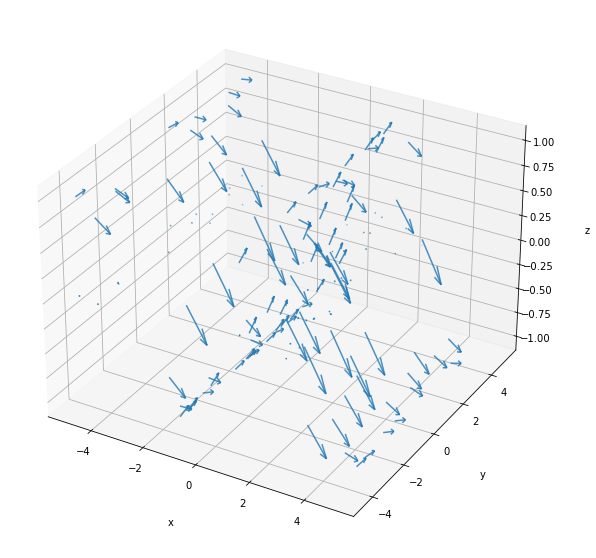

In [17]:
# plot sampled points and their flows
# 1) define function and plot ribbon

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(projection='3d')

# plot points
plt.scatter(points_mat[:, 0], points_mat[:, 1], points_mat[:, 2])

# plot flow
mask_prob = 0 # percentage not plotted
mask = np.random.rand(num_points) > mask_prob
ax.quiver(points_mat[mask, 0], points_mat[mask, 1], points_mat[mask, 2], flow_mat[mask, 0], flow_mat[mask, 1], flow_mat[mask, 2], alpha=0.8, length=0.5)

# label axis
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)


plt.show()

References

[1] https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html
